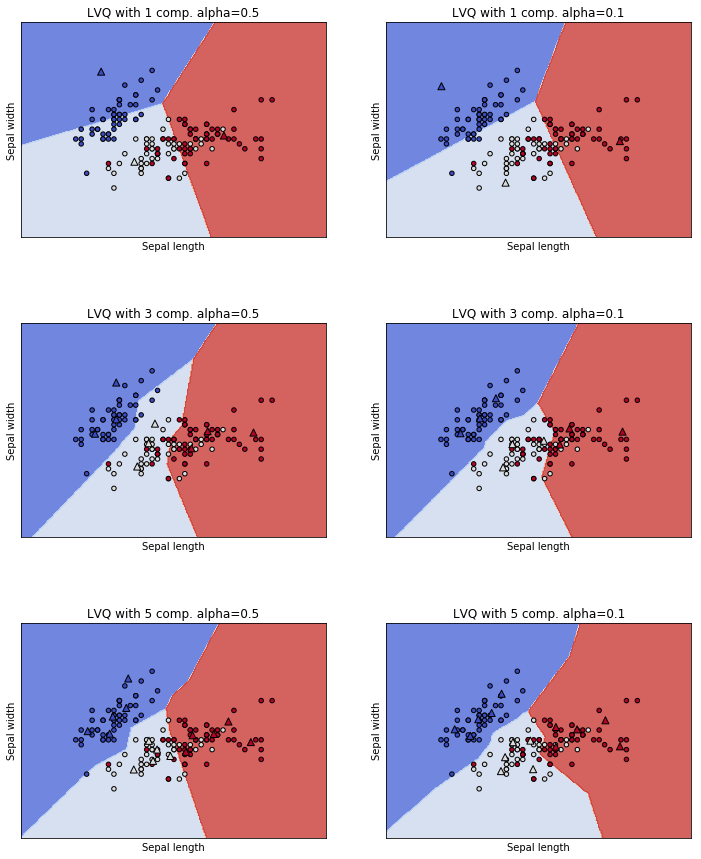

In [2]:
#LVQ = Learning Vector Quantization

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from LVQClassifier import LVQClassifier as LVQ

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

iris = datasets.load_iris()

X = iris.data [:, :2]
y = iris.target


# LVQ parameter
epochs = 10
LVQ2 = False
models = (LVQ(n_components=1,alpha=0.5,epochs=epochs,LVQ2=LVQ2),
          LVQ(n_components=1,alpha=0.1,epochs=epochs,LVQ2=LVQ2),
          LVQ(n_components=3,alpha=0.5,epochs=epochs,LVQ2=LVQ2),
          LVQ(n_components=3,alpha=0.1,epochs=epochs,LVQ2=LVQ2),
          LVQ(n_components=5,alpha=0.5,epochs=epochs,LVQ2=LVQ2),
          LVQ(n_components=5,alpha=0.1,epochs=epochs,LVQ2=LVQ2))

models = (clf.fit(X, y) for clf in models) # sklearn loop over the models

# title for the plots
titles = ('LVQ with 1 comp. alpha=0.5',
          'LVQ with 1 comp. alpha=0.1',
          'LVQ with 3 comp. alpha=0.5',
          'LVQ with 3 comp. alpha=0.1',
          'LVQ with 5 comp. alpha=0.5',
          'LVQ with 5 comp. alpha=0.1')

fig, sub = plt.subplots(3, 2, figsize=(12,15))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    X_LVQ = clf.weights
    y_LVQ = clf.label_weights
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.scatter(X_LVQ[:, 0], X_LVQ[:, 1], c=y_LVQ,
               cmap=plt.cm.coolwarm, s=50, marker='^', edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()